In [27]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using StatsBase

In [28]:
n_rep = 1000
q = 0

n_com = 250
n = 2*n_com
η = 0.
rng = Random.default_rng();

# planted ranking score
planted_score = randperm(rng,n)

println("Forests")
noise_range = 0.07 : 0.01 : 0.2
nb = length(noise_range) 

av_time_mtsf = zeros(nb,1)
median_time_mtsf = zeros(nb,1)
std_time_mtsf = zeros(nb,1)
mean_nb_cycles = zeros(nb,1)
std_nb_cycles = zeros(nb,1)

for i_q = 1:nb
    # skipping the case i_q = 0 (julia warm up) 
    time_mtsf_tp = zeros(n_rep,1)
    nb_cycles_tp = zeros(n_rep,1)

    noise = noise_range[i_q]
    meta_g = gen_graph_cliques(rng,n_com,noise,η;planted_score)

    for i_rep = 1:n_rep
        vec_mtsf = @timed multi_type_spanning_forest(rng, meta_g, q)
        mtsf = vec_mtsf[1]
        cycles = get_prop(mtsf,:cycle_nodes)
        nb_cycles_tp[i_rep] = length(cycles)

        t_mtsf = vec_mtsf[2]
        time_mtsf_tp[i_rep] = t_mtsf
    end
    if i_q > 0
        mean_nb_cycles[i_q] = mean(nb_cycles_tp)
        std_nb_cycles[i_q] = std(nb_cycles_tp)

        av_time_mtsf[i_q] = mean(time_mtsf_tp)
        median_time_mtsf[i_q] = median(time_mtsf_tp)
        std_time_mtsf[i_q] = std(time_mtsf_tp)
    end
end

println("USTs")
# parameters
absorbing_node = true
ust = true

time_ust_tp = zeros(n_rep,1)
for i_rep = 0:n_rep
    # skipping the case i_rep = 0 (julia warm up) 
    q_ust = 0
    vec_ust = @timed multi_type_spanning_forest(rng, meta_g, q_ust;absorbing_node, ust)
    t_ust = vec_ust[2]
    if i_rep > 0
        time_ust_tp[i_rep] = t_ust
    end
end

av_time_ust = mean(time_ust_tp)*ones(size(noise_range))
median_time_ust = median(time_ust_tp)*ones(size(noise_range))
std_time_ust = std(time_ust_tp)*ones(size(noise_range))

SEM_mtsf = std_time_mtsf/sqrt(n_rep)
SEM_ust = std_time_ust/sqrt(n_rep)

# plot(noise_range, median_time_mtsf, labels = "crsf")
# plot!(noise_range, median_time_ust, labels = "ust",  
# xtickfont=font(13),
# ytickfont=font(13),
# guidefont=font(13),
# legendfont=font(13),
# framestyle=:box,)
# xlabel!("q")
# ylabel!("time")

# plot(noise_range, av_time_mtsf,ribbon=std_time_mtsf, labels = "crsf")
# plot!(noise_range, av_time_ust,ribbon=std_time_ust, labels = "ust",  
# xtickfont=font(13),
# ytickfont=font(13),
# guidefont=font(13),
# legendfont=font(13),
# framestyle=:box,)
# xlabel!("q")
# ylabel!("time")

Forests


USTs


14-element Vector{Float64}:
 0.00030700498173529944
 0.00030700498173529944
 0.00030700498173529944
 0.00030700498173529944
 0.00030700498173529944
 0.00030700498173529944
 0.00030700498173529944
 0.00030700498173529944
 0.00030700498173529944
 0.00030700498173529944
 0.00030700498173529944
 0.00030700498173529944
 0.00030700498173529944
 0.00030700498173529944

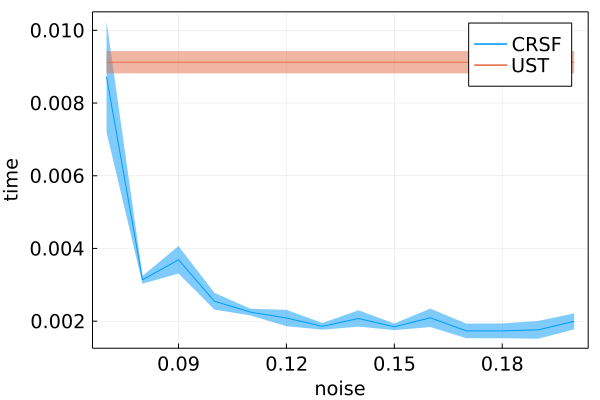

In [31]:
plot(noise_range, av_time_mtsf, ribbon = SEM_mtsf, labels = "CRSF")
plot!(noise_range, av_time_ust, ribbon = SEM_ust, labels = "UST",  
xtickfont=font(13),
ytickfont=font(13),
guidefont=font(13),
legendfont=font(13),
framestyle=:box,)
xlabel!("noise")
ylabel!("time")


In [32]:
foldername = "figures/"
name = "clique_timing.pdf"
savefig(foldername*name)

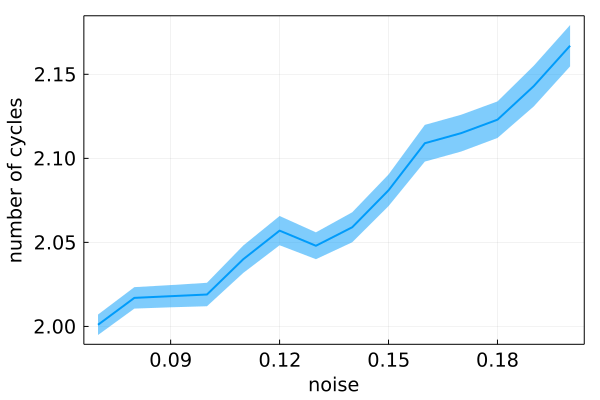

In [33]:
plot(noise_range,mean_nb_cycles,
ribbon = std_nb_cycles/sqrt(n_rep),        
markerstrokecolor=:auto,
linewidth=2,
xtickfont=font(13),
ytickfont=font(13),
guidefont=font(13),
framestyle=:box, legend = false,
margins=0.1 * 2cm)

xlabel!("noise")
ylabel!("number of cycles")

In [34]:
plot(noise_range,mean_nb_cycles,
ribbon = std_nb_cycles/sqrt(n_rep),        
markerstrokecolor=:auto,
linewidth=2,
xtickfont=font(13),
ytickfont=font(13),
guidefont=font(13),
framestyle=:box, legend = false,
margins=0.1 * 2cm)

xlabel!("noise")
ylabel!("number of cycles")

foldername = "figures/"
name = "clique_timing_nb_cycles.pdf"
savefig(foldername*name)

In [80]:
# number of batches and MC runs
n_batch = 5;
n_rep = 1; #paper 50
D_all = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng)

Dict{Any, Any} with 6 entries:
  "DPP unif" => Dict{String, Any}("cond_nb_std"=>[NaN, NaN, NaN, NaN, NaN], "ro…
  "iid LS"   => Dict{String, Any}("cond_nb_std"=>[NaN, NaN, NaN, NaN, NaN], "ro…
  "UST unif" => Dict{String, Any}("cond_nb_std"=>[NaN, NaN, NaN, NaN, NaN], "ro…
  "iid unif" => Dict{String, Any}("cond_nb_std"=>[NaN, NaN, NaN, NaN, NaN], "ro…
  "DPP LS"   => Dict{String, Any}("cond_nb_std"=>[NaN, NaN, NaN, NaN, NaN], "ro…
  "UST LS"   => Dict{String, Any}("cond_nb_std"=>[NaN, NaN, NaN, NaN, NaN], "ro…

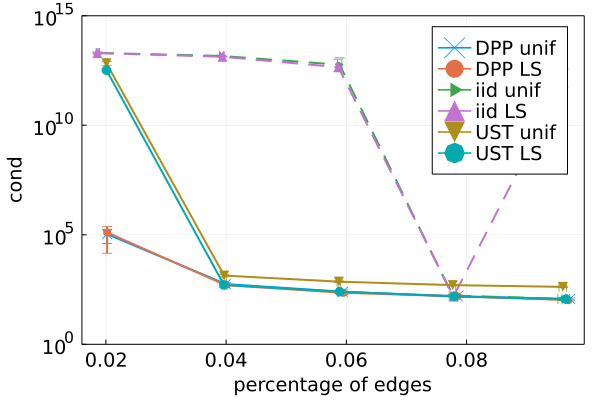

GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE


In [75]:
metric= "cond_nb" #"spear" #"tau" #"err"
y_limits = (1, 1e15)
legendposition=:topright
plot_comparison_sync(metric,D_all,y_limits;legendposition)

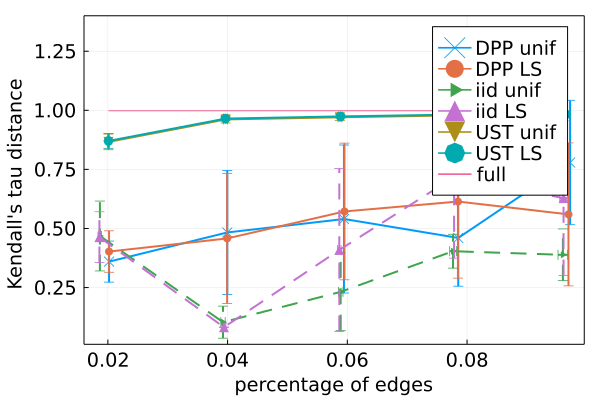

In [76]:
metric= "tau" #"spear" #"tau" #"err"
y_limits = (1e-2, 1.4)
legendposition=:topright
plot_comparison_sync(metric,D_all,y_limits;legendposition)

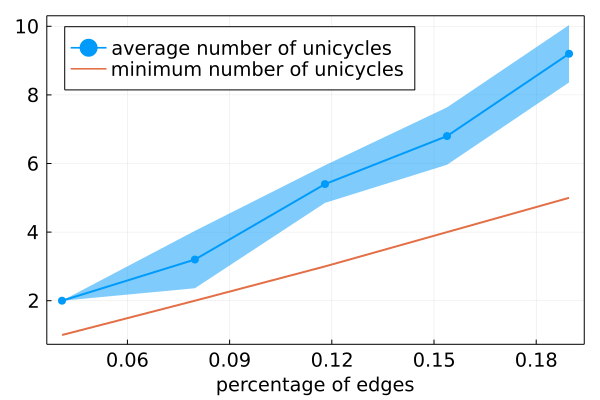

In [49]:
method = "DPP unif"
legendposition=:topleft
plot_nb_cycles(D_all,method;legendposition)

In [54]:
q=0
weighted = true
t=3
L_av, n_cles, n_rts, weights = average_sparsifier(
    rng, meta_g, nothing, q, t; weighted
)

(ComplexF64[0.8334175084175085 - 5.915550949082049e-18im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 1.1667845117845117 + 1.2963817999478687e-17im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 1.0001010101010104 - 2.7755575615628914e-17im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.8334175084175085 + 0.0im], 6.0, 0.0, [1.0; 1.0; 1.0])

In [57]:
l = eigvals(L_av);
real(l[1:4])

4-element Vector{Float64}:
 0.0017168586710892336
 0.0019852421267545035
 0.21722235235414572
 0.25188937908610265

In [59]:
    # incidence matrix
    B = magnetic_incidence(meta_g)
    B_ust = magnetic_incidence_matrix(meta_g; oriented=true, phases=false)

    #######################################
    # syncrank with full magnetic Laplacian
    W = I # weight matrix
    if weighted
        e_weights = get_edges_prop(meta_g, :e_weight, true, 1.0)
        W *= diagm(e_weights)
    end
    L = B * W * B'

    l_exact = eigvals(L)
    

200-element Vector{ComplexF64}:
 0.002742378532145655 + 2.521581074791473e-18im
 0.002957860978710296 + 6.580248161544943e-18im
   0.9935380341105867 + 6.086096775959817e-19im
   0.9946993795239067 + 2.81953459894951e-17im
   0.9948708227363925 - 2.8018607085345343e-17im
   0.9950812686694497 - 4.2005347588782144e-17im
   0.9957036848619627 - 2.1971950661099248e-17im
   0.9958428884171232 - 6.136927726160241e-17im
    0.996123860350143 - 3.2313152358396054e-17im
   0.9964612879629989 - 1.0883083486120422e-16im
                      ⋮
   1.0233422017512488 - 9.181307265546804e-17im
   1.0237294531313814 + 1.9296363700148442e-17im
   1.0239913882600773 - 1.7255012803163766e-16im
   1.0244532291320685 + 6.822779384017286e-17im
   1.0247322192173156 - 3.574407969858028e-17im
   1.0250673409067876 - 3.3610514218255506e-17im
   1.0252591504929833 - 7.746564099311166e-17im
   1.0264192406707642 - 3.4188209645721245e-17im
    1.029303414569478 + 1.0733887230028694e-17im

In [60]:
W

9901×9901 Matrix{Float64}:
 0.010101  0.0       0.0       0.0       …  0.0       0.0       0.0
 0.0       0.010101  0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.010101  0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.010101     0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0       …  0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 ⋮                                       ⋱                      ⋮
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.